# Aula 4 - Pandas e Seaborn

Nessa aula, iremos tratar dos seguintes conteúdos:
- Combinando DataFrames
- Agrupamentos no Pandas
- Seaborn
- Arquivos de Dados do Seaborn
- Outras Visualizações do Seaborn

In [16]:
import pandas as pd
import numpy as np

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fusão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

In [17]:
# Construindo dois DataFrames que serão fundidos com o método 'merge'
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b','d'], 
                   'data2': range(5)})

# Print do primeiro Dataframe
print(df1)

# Print do Segundo Dataframe
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
3   b      3
4   d      4


In [18]:
# Usando o merge a partir de uma chave primaria
pd.merge(df1, df2, on ='key') ## Recebe 2 dataframes e uma chave

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [23]:
# Com o how podemos passar o tipo merge que queremos fazer (left, right, inner, outer)
pd.merge(df1, df2, on ='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,6.0,1.0
5,b,6.0,3.0
6,a,2.0,0.0
7,a,4.0,0.0
8,a,5.0,0.0
9,c,3.0,NaN


### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [25]:
# Construindo 3 séries especificando os rótulos das linhas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([1,5, 6], index=['a','f', 'd']) 

# Print das Series
print(s1)
print(s2)
print(s3)

# Contatenando as 3 séries na vertical (axis=0 por default)
# concat recebe uma lista de series ou dataframes
pd.concat([s1, s2, s3]) # recebe uma lista de series ou dataframes

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
a    1
f    5
d    6
dtype: int64


a    0
b    1
c    2
d    3
e    4
a    1
f    5
d    6
dtype: int64

In [26]:
# Concatenando as 3 séries por colunas especificando o parâmetro 'axis=1'
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,1.0
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,6.0
e,NaN,4.0,NaN
f,NaN,NaN,5.0


### pivot
O método __pivot__ é equivalente ao pivot table do excel.

In [29]:
df_titanic = pd.read_csv('titanic.csv')

## Parametros -> Dataset, valores = valores que vão calcular, index=linhas, columns = colunas
pd.pivot_table(df_titanic, values='Age', index='Pclass', columns='Sex', aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

In [30]:
# Calcula a média de Idade por Sexo
## para agruparmos usamos o metodo group by
## no parentesis passamos uma coluna ou um conjunto de colunas
## Depois precisamos passar entre colchetes o campo que vamos agrupar
## Por fim passamos a metrica que quermos

df_titanic.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

In [33]:
# Calculo das Métricas para o Agrupamento Sexo e Idade
# Quero calcular muitas metricas na mesma linha
# podemos usar o .agg e passar uma lista de metricas

df_titanic.groupby(['Sex'])["Age"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
Sex,,,,
female,27.915709,27.0,14.110146,261
male,30.726645,29.0,14.678201,453


In [34]:
# Com mais de uma categoria dentro do Groupby
# Quero ter mais de uma categoria
# Podemos passar no parentesis uma lista de colunas também

df_titanic.groupby(['Pclass', 'Sex'])["Age"].agg(["mean", "median", "std", "count"])

mean  median        std  count
Pclass Sex                                        
1      female  34.611765    35.0  13.612052     85
       male    41.281386    40.0  15.139570    101
2      female  28.722973    28.0  12.872702     74
       male    30.740707    30.0  14.793894     99
3      female  21.750000    21.5  12.729964    102
       male    26.507589    25.0  12.159514    253

In [35]:
# Mais de uma categoria e mais de uma métrica calculando
# Podemos calcular para um conjunto de dados diferentes as metricas
# basta passar no indexador (no colchete) uma lista de colunas

df_titanic.groupby(['Pclass', 'Sex'])[["Age", 'Survived']].agg(["mean", "median", "std", "count"])

Age                          Survived                   \
                    mean median        std count      mean median       std   
Pclass Sex                                                                    
1      female  34.611765   35.0  13.612052    85  0.968085    1.0  0.176716   
       male    41.281386   40.0  15.139570   101  0.368852    0.0  0.484484   
2      female  28.722973   28.0  12.872702    74  0.921053    1.0  0.271448   
       male    30.740707   30.0  14.793894    99  0.157407    0.0  0.365882   
3      female  21.750000   21.5  12.729964   102  0.500000    0.5  0.501745   
       male    26.507589   25.0  12.159514   253  0.135447    0.0  0.342694   

                     
              count  
Pclass Sex           
1      female    94  
       male     122  
2      female    76  
       male     108  
3      female   144  
       male     347

## Exercício

1 - Utilize uma função agregada para saber a passagem média e também a soma do dinheiro gasto em passagens por ponto de embarque

2 - Utilize o pivot table para calcular o total de dinheiro gasto em passagens por homens e mulheres de classe

In [46]:
df_titanic.groupby(['Embarked'])[['Fare']].agg(['sum', 'mean'])

Fare           
                 sum       mean
Embarked                       
C         10072.2962  59.954144
Q          1022.2543  13.276030
S         17439.3988  27.079812

In [45]:
pd.pivot_table(df_titanic, values='Fare', index='Pclass', columns='Sex', aggfunc=np.sum)

Sex,female,male
Pclass,,
1,9975.8250,8201.5875
2,1669.7292,2132.1125
3,2321.1086,4393.5865


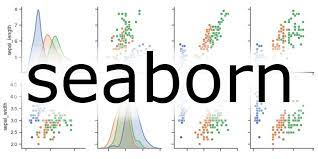

## 

## Seaborn

Quando falamos de visualização de dados, além do __Matplotlib__ uma das principais bibliotecas que temos para utilizar é o __Seaborn__.<br>
<br>
O __Seaborn__ é uma biblioteca baseado no próprio _Matplotlib_, mas focada em gráficos de alta performance, ou seja iremos fazer gráficos de uma maneira __mais simples__ e com uma __riqueza maior nas informações__ que queremos passar com os gráficos.

Para instalar o __Seaborn__ no seu Jupyter Notebooks (quando não tenha já instalado), precisa ser descomentar e rodar o código abaixo:

In [5]:
#!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Primeiro passo será importarmos a bibloteca para o notebook:

In [47]:
# Carregando a Biblioteca
import seaborn as sns

Além do __Seaborn__, vamos importar algumas outras bibliotecas que serão úteis durante a aula:

In [48]:
# Carregando outras bibliotecas bem úteis
import matplotlib.pyplot as plt

## 

## Arquivos de Datasets do Seaborn

Utilizando a função __load_dataset__, conseguimos carregar alguns datasets bem conhecidos na aprendizagem de Data Science como por exemplo o _Titanic_, _Tips_ entre outros. Podemos consultar todos os datasets disponíveis usando a função __get_dataset_names__:

In [49]:
# usando a função get_dataset_names para saber todos os datasets disponíveis
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Vamos utilizar o dataset _Iris_ para começar as análises:

In [50]:
# Carrega o dataset Iris
iris = sns.load_dataset('iris')

O _Iris_ é um dataset bem conhecido sobre a classificação de 3 espécies de plantas: _setosa_, _virgínica_ e _versicolor_:<br><br>
<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width = 800>

Antes de partirmos para análises e novos gráficos de fato, vamos começar a exercitar as boas práticas quando trabalhamos com análise de dados:

In [103]:
# Olhando sobre o DataFrame e seu preenchimento
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Print das primeiras linhas do Iris
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Levantando as principais métricas estatísticas para o DataFrame
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vamos dar uma olhada como está dividido em cada uma das espécies da _Iris_:

In [16]:
# Value counts das categorias
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

##  

## Seaborn x Matplotlib

Primeiramente, vamos recordar como fazer um gráfico de dispersão usando o __Matplotlib__:

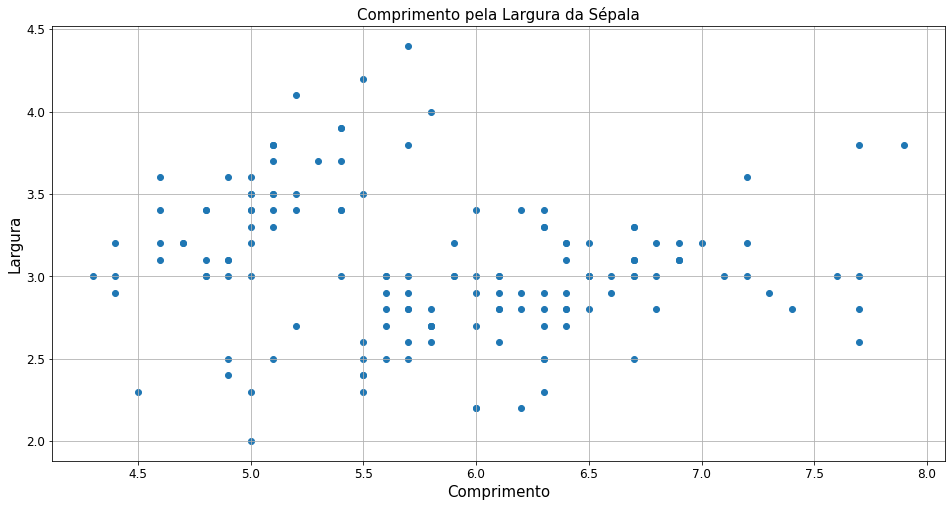

In [58]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16, 8)) #Tamanho em polegadas

# Gráfico de Linha
plt.scatter('sepal_length', 'sepal_width', data = iris)

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 15)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize = 15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize = 15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, podemos fazer o mesmo gráfico utilizando a função __scatterplot__: 

/home/daniel-henedino/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


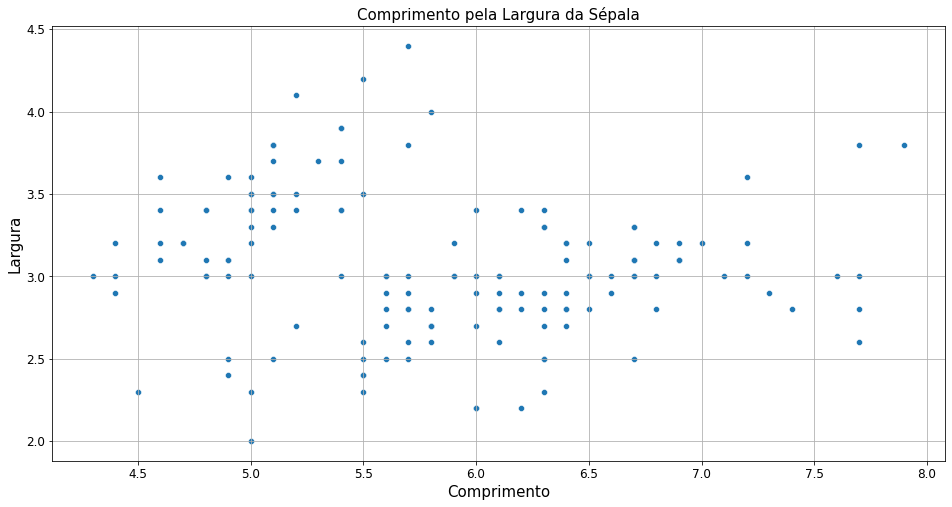

In [60]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16, 8)) #Tamanho em polegadas

# Gráfico de Dispersão
sns.scatterplot('sepal_length', 'sepal_width', data = iris)

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 15)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize = 15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize = 15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

Mas então, a primeira pergunta é: __quais são as vantagens de usar o Seaborn ao invés do Matplotlib?__<br><br>
Vamos imaginar que queremos fazer o mesmo gráfico mas separando as pelos tipos de _Iris_ (ou seja, separar pelas classes):

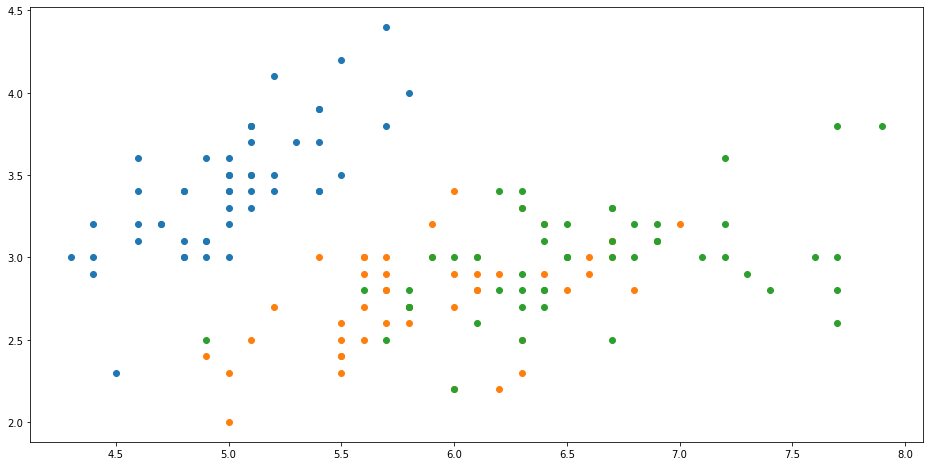

In [61]:
# Separe o DataFrame entre as 3 classes
df_set = iris[iris['species'] == 'setosa']
df_ver = iris[iris['species'] == 'versicolor']
df_vir = iris[iris['species'] == 'virginica']

# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

plt.scatter('sepal_length', 'sepal_width', data = df_set)
plt.scatter('sepal_length', 'sepal_width', data = df_ver)
plt.scatter('sepal_length', 'sepal_width', data = df_vir)

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Colocando a Legenda do Gráfico

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, sempre que quisermos quebrar um gráfico nas classes basta passar um parâmetro chamado __hue__:

In [19]:
# Ajustando o tamanho da Figura

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

E o __Seaborn__ nos permite customizar diversas detalhes do nosso gráfico:

In [20]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de Linha


# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

<Figure size 1152x576 with 0 Axes>

In [21]:
# Define a semente randômica

# Cria um valor de size no DataFrame

# Ajustando o tamanho da Figura

# Escolhendo um Pallete de Cores

# Passando um parâmetro de Size para o gráfico

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

Um site bem interessante que vocês podem escolher cores para monta o Palette Cutsomizado é o [Coolors](https://coolors.co/)

In [62]:
titanic = sns.load_dataset('titanic')

## Exercícios

1 - Utilize o dataset do titanic, junto com a estratégia do scatter plot colorido (exemplos acima), para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sexo biologico

2 - Utilize a mesma estratégia para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sobrevivencia

## Outras Visualizações do Seaborn

Vamos passar agora, por algumas das principais visualizações que acabam sendo utilizadas do __Seaborn__:

### PairPlot

In [124]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
# Cria o pairplot

# Mostra o gráfico
plt.show()

##  

### JointPlot

In [23]:
# Cria o Jointplot

# Mostra o Gráfico
plt.show()

##  

### Distplot e Histplot

In [24]:
# Cria o distplot

#mostra o Gráfico
plt.show()

In [25]:
# Cria o displot


#mostra o Gráfico
plt.show()

In [26]:
# Cria o distplot

#mostra o Gráfico
plt.show()

##  

### FacetGrid

In [28]:
# Cria o FacetGrid

# Cria o gráfico relacionado

# Mostra o Gráfico
plt.show()

##  

### LMPlot

In [29]:
# Constroi o LMPlot


# Mostra o Gráfico
plt.show()

In [30]:
# Constroi o LMPlot


# Mostra o Gráfico
plt.show()

## 

## Exercícios

1 - Verifique se alguma outra combinação de variáveis é um bom classificador para sexo biologico

2 - Gere um histograma das idades do Titanic

Escolha um dataset da lista do começo da aula para os próximos exercícios

3 - Escolha um dataset da lista e utilize o pairplot para analisar o comportamento dos parametros

4 - Explore a documentação do seaborn e gere alguma visualização interessante que valide alguma hipótese do grupo

### HeatMap

O __HeatMap__ (Mapa de Calor) é um gráfico bem interessante quando queremos criar um _Grid_ de variações.<br><br>
Para usar o HeatMap, vamos definir primeiramente as correlações do DataFrame _Iris_:

,sepal_length,sepal_width,petal_length,petal_width,size
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.025553
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.049211
petal_length,0.871754,-0.428440,1.000000,0.962865,0.019554
petal_width,0.817941,-0.366126,0.962865,1.000000,0.024062
size,0.025553,-0.049211,0.019554,0.024062,1.000000


A função __corr__ mostra como as variáveis do DataFrame estão relacionadas, ou seja o quanto cada variável influência na variação das outras:

In [31]:
# Cria o HeatMap


# Mostra o Gráfico
plt.show()

## 

### CountPlot e BarPlot

## 

## Desafio

__1)__ Façam a análise exploratória com o que aprendemos até então (NumPy, Pandas, Matplotlib e Seaborn) num dataset do Kaggle.
Levante visualizações que possam ser interessantes e tentem interpretar os dados!

## 

## Links, Artigos e Referências:

- [Documentação do Matplotlib](https://matplotlib.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Matplotlib;
- [Documentação do Seaborn](https://seaborn.pydata.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Seaborn;
- [Documentação do Plotly](https://plotly.com/python/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Plotly;
- [Beautiful Plots with Python and Seaborn](https://betterprogramming.pub/beautiful-plots-with-python-and-seaborn-9d05c9ead6ed), artigo publicado no blog Better Programming
- [MAtplotlib vs Seaborn vs Plotly](https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb), artigo publicado pela Towards Data Science comparando as 3 bibliotecas;
- ["Como criar gráficos interativos utilizando Plotly e Python"](https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b?source=---------62----------------------------), artigo escrito por Paulo Vasconcellos para o Data Hackers.